# Oracle-Reto 2: Análisis de sentimiento

*NUWE EVA*, la cadena de restauración fast food y healthy, sigue creciendo y queremos dar un paso más para mejorar y ofrecer el mejor servicio posible a nuestros clientes.

Queremos evolucionar y ofrecer nuevas capacidades a nuestro robot y talentoso camarero, *EVA*, añadiendo la función de poder detectar, a través de frases y palabras utilizadas por los comensales, el grado de satisfacción de los platos probados y así ver qué platos y productos han gustado más o menos a los clientes.

Nuestro robot ya sabe detectar lo que pedirán los comensales según los productos elegidos. Ahora queremos saber cuál es el feedback de cada cliente para detectar si le ha gustado o no el plato servido.

> Objetivo
Crea un modelo predictivo de **clasificación** para poder **ordenar y o catalogar las reseñas**. Primero entrena tu modelo con las reseñas de entrenamiento. Una vez tengas el modelo que maximice la puntuación F1 (macro.), utiliza las reseñas de prueba como entrada para tu modelo.

In [1]:
from numpy import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('../Data/train.csv',index_col = [0])
test = pd.read_csv('../Data/test.csv',index_col = [0])

In [3]:
train.head()

,text,label,label_text
train_idx,,,
0,i really do recommend this to anyone in need o...,1,positive
1,very good every day camera fits nicely in the ...,1,positive
2,"but , dollar for dollar , this dvd player is p...",1,positive
3,i got this phone yesterday and didn ' t find a...,1,positive
4,1 ) price gb of storage,1,positive


In [4]:
test.head()

,text
test_idx,
0,fm receiver it has none
1,"the picture quality surprised me , when i firs..."
2,great video clip quality for a digital camera ...
3,creative did well on its rechargeable battery ...
4,i highly recommend this camera to anyone looki...


In [5]:
''' shape '''
print(f'shape de los datos train {train.shape}')
print(f'shape de los datos test {test.shape}')

shape de los datos train (3016, 3)
shape de los datos test (754, 1)


In [6]:
train.drop(['label_text'],axis = 1,inplace = True)
train.label.value_counts()

1    1926
0    1090
Name: label, dtype: int64

In [7]:
# import natural language tool kit
import nltk as nlp
# import regex
import re

def tokenizar(texto):
    '''
    Esta función limpia y tokeniza el texto en palabras individuales.
    El orden en el que se va limpiando el texto no es arbitrario.
    El listado de signos de puntuación se ha obtenido de: print(string.punctuation)
    y re.escape(string.punctuation)
    '''

    # Se convierte t0do el texto a minúsculas
    nuevo_texto = texto.lower()
    # Eliminación de signos de puntuación
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    # Eliminación de números
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
    # Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    # Tokenización por palabras individuales
    nuevo_texto = nuevo_texto.split(sep = ' ')
    # Eliminación de tokens con una longitud < 2
    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]
    # Lematización de palabras
    lemma = nlp.WordNetLemmatizer()
    nuevo_texto = [lemma.lemmatize(token) for token in nuevo_texto]

    return(nuevo_texto)

# Stop words

En la tabla anterior puede observarse que los términos más frecuentes en todos los usuarios se corresponden con artículos, preposiciones, pronombres…, en general, palabras que no aportan información relevante sobre el texto. Ha estas palabras se les conoce como stopwords. Para cada idioma existen distintos listados de stopwords, además, dependiendo del contexto, puede ser necesario adaptar el listado. Por ejemplo, en la tabla anterior aparece el término amp que procede de la etiqueta html &amp. Con frecuencia, a medida que se realiza un análisis se encuentran palabras que deben incluirse en el listado de stopwords.

In [8]:
from nltk.corpus import stopwords
# Obtain list of stopwords
stop_words = list(stopwords.words('english'))
print(stop_words[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [9]:
# Creación de la matriz tf-idf
# ==============================================================================
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizador = TfidfVectorizer(
                        tokenizer  = tokenizar, #
                        min_df     = 2, #
                        stop_words = stop_words #
                    )
tfidf_vectorizador.fit(train.text)

/Users/manugnzl/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/manugnzl/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe', 'ha', 'wa'] not in stop_words.
  warnings.warn(


TfidfVectorizer(min_df=2,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenizar at 0x7ff29682aaf0>)

In [10]:
Xtrain = tfidf_vectorizador.transform(train.text)
Xtest  = tfidf_vectorizador.transform(test.text)

In [11]:
Ytrain = train.label

In [12]:
print(f" Número de tokens creados: {len(tfidf_vectorizador.get_feature_names_out())}")
print(tfidf_vectorizador.get_feature_names_out()[:10])

 Número de tokens creados: 2155
['ability' 'able' 'absolute' 'absolutely' 'ac' 'acceptable' 'access'
 'accessible' 'accessing' 'accessory']


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [14]:
kf = KFold(n_splits = 5, shuffle=True, random_state = 0)

In [15]:
models = []
models.append(('glm', LogisticRegression(random_state=99)))
models.append(('dectree', DecisionTreeClassifier(random_state=99)))
models.append(('rf', RandomForestClassifier(random_state=99)))
models.append(('gb', GradientBoostingClassifier(random_state=99)))
models.append(('xgb', XGBClassifier()))
models.append(('bag', BaggingClassifier(random_state=99)))
models.append(('svmr', SVC(random_state=99)))
models.append(('svml', SVC(kernel='linear',random_state=99)))

def boxplots_algorithms(results, names):

    plt.figure(figsize=(8,8))
    plt.boxplot(results)
    plt.xticks(range(1,len(names)+1), names)
    plt.show()

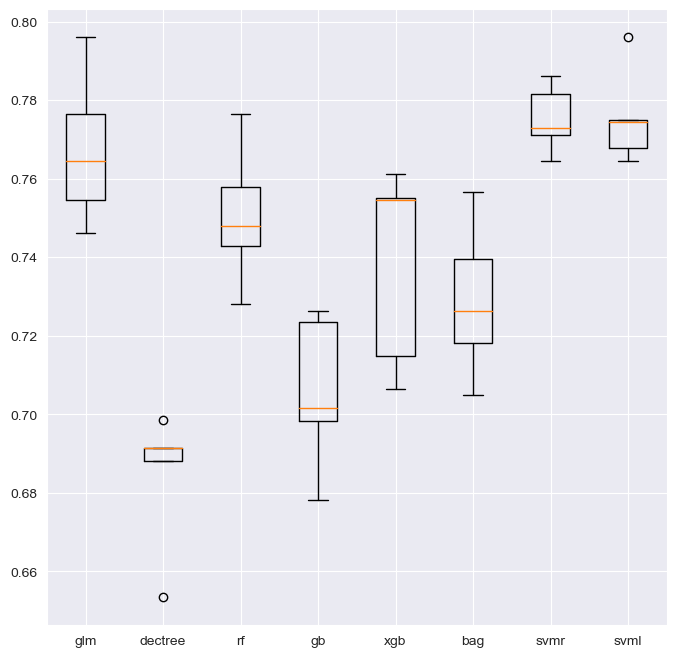

In [16]:
results = []
names = []

for name,model in models:
    acc = cross_val_score(model, Xtrain,Ytrain, cv = kf,scoring='accuracy')
    names.append(name)
    results.append(acc)

boxplots_algorithms(results, names)

In [17]:
svm = SVC(random_state=99,kernel='linear')
svm.fit(Xtrain,Ytrain)

SVC(kernel='linear', random_state=99)

In [18]:
svm.coef_.toarray()

array([[ 0.13998502,  0.23935057,  0.3063824 , ..., -0.59648034,
        -0.89393635, -0.20100349]])

In [19]:
tfidf_vectorizador.get_feature_names_out()

array(['ability', 'able', 'absolute', ..., 'zero', 'zone', 'zoom'],
      dtype=object)

In [20]:
pd.DataFrame(svm.coef_.toarray(), columns=tfidf_vectorizador.get_feature_names_out())

,ability,able,absolute,absolutely,ac,acceptable,access,accessible,accessing,accessory,...,yes,yesterday,yet,yield,zealand,zen,zennx,zero,zone,zoom
0,0.139985,0.239351,0.306382,0.331271,0.250377,0.45452,-0.20681,0.252956,-0.711303,-0.055218,...,-0.932667,0.12554,0.785662,0.31868,0.426396,0.60068,-0.31635,-0.59648,-0.893936,-0.201003


In [21]:
data = pd.DataFrame(svm.coef_.toarray(), columns=tfidf_vectorizador.get_feature_names_out())

In [22]:
datos = data.T
datos

,0
ability,0.139985
able,0.239351
absolute,0.306382
absolutely,0.331271
ac,0.250377
...,...
zen,0.600680
zennx,-0.316350
zero,-0.596480
zone,-0.893936


In [23]:
datos['abs'] = abs(datos)
datos

,0,abs
ability,0.139985,0.139985
able,0.239351,0.239351
absolute,0.306382,0.306382
absolutely,0.331271,0.331271
ac,0.250377,0.250377
...,...,...
zen,0.600680,0.600680
zennx,-0.316350,0.316350
zero,-0.596480,0.596480
zone,-0.893936,0.893936


In [27]:
datos.reset_index(inplace= True)
datos.sort_values(by = 'abs', ascending= False)

,index,0,abs
805,great,3.121324,3.121324
1080,love,2.382428,2.382428
2129,would,-2.301888,2.301888
1655,scratch,-2.262850,2.262850
580,easy,2.259677,2.259677
...,...,...,...
429,crop,0.000000,0.000000
2016,uploading,0.000000,0.000000
193,boast,0.000000,0.000000
457,decade,0.000000,0.000000


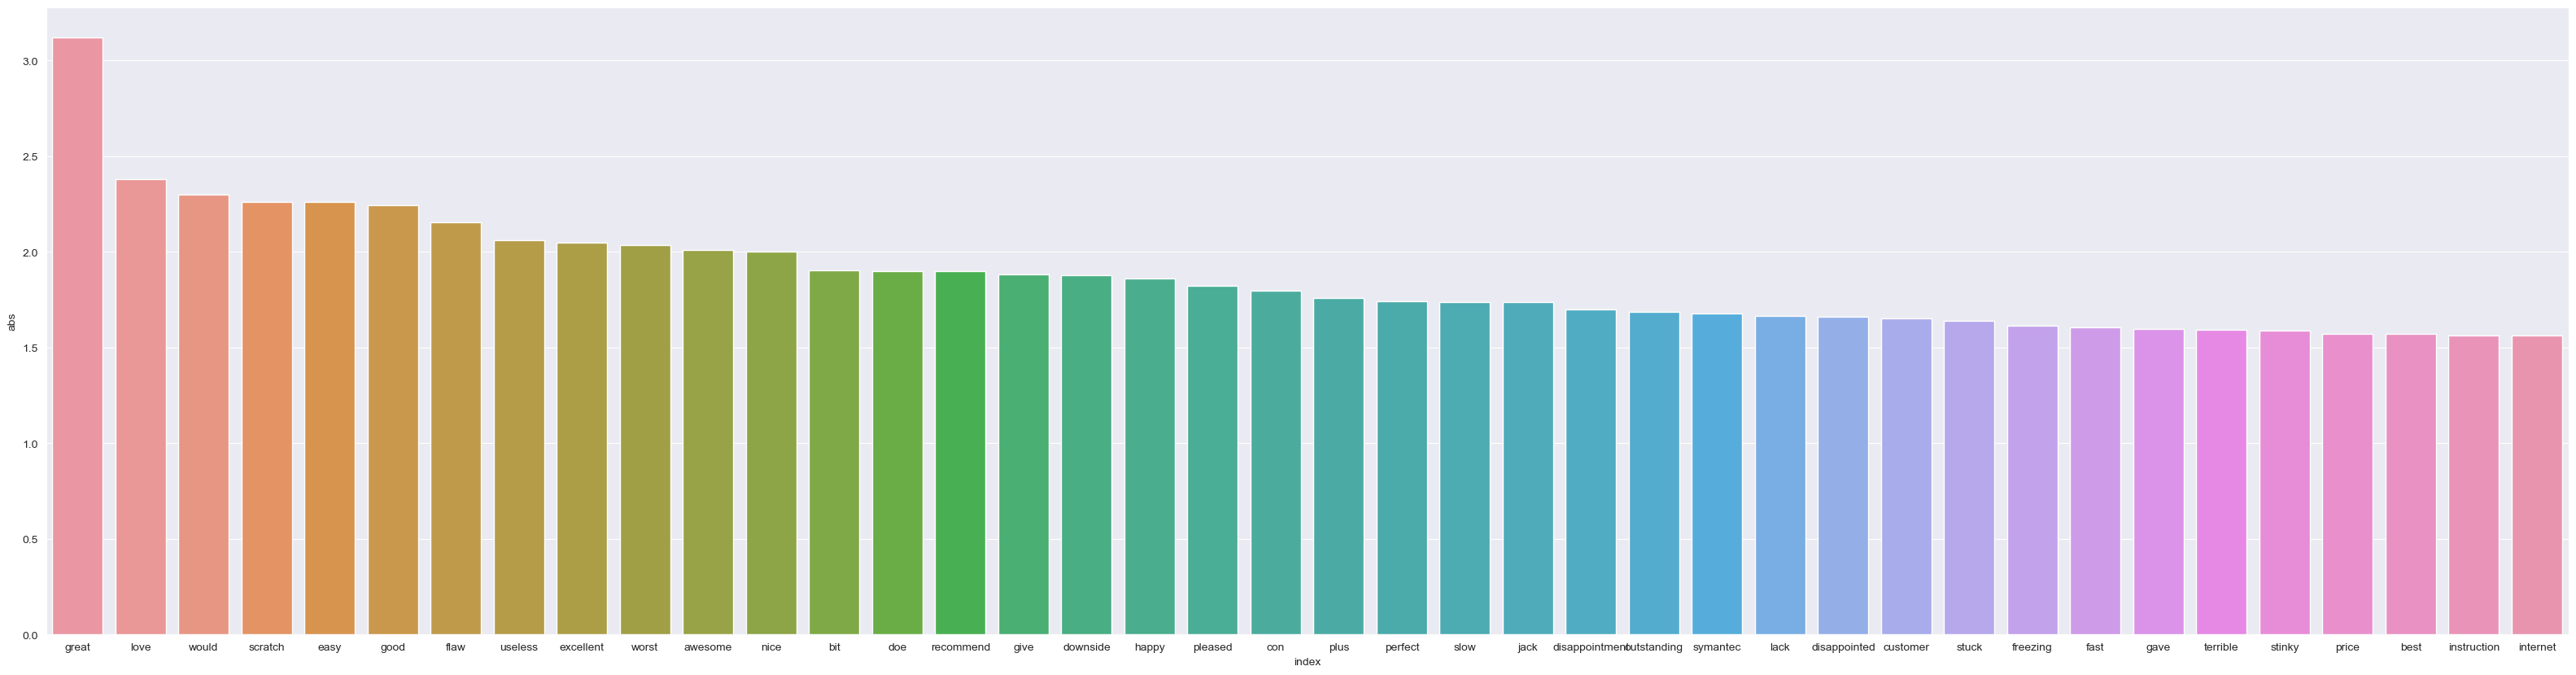

In [34]:
datos = datos.sort_values(by = 'abs', ascending= False)
plt.figure(figsize=(40,10))
sns.barplot(data = datos.iloc[:40,:], x = 'index' ,y = 'abs')
plt.show()

In [35]:
tfidf_vectorizador.get_feature_names_out()

array(['ability', 'able', 'absolute', ..., 'zero', 'zone', 'zoom'],
      dtype=object)